<a href="https://colab.research.google.com/github/Ishu011/Advanced-Fraud-Detection-in-Financial-Transactions-Using-Machine-Learning/blob/main/Advanced_World_population_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Loading the Dataset

In [30]:

df = pd.read_csv('world_population.csv')
df.head(10)


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


Data Preprocessing

In [31]:
# Checking for missing values
print(df.isnull().sum())

numeric_df = df.select_dtypes(include=np.number)
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Update the dataFrame with filled values
df[numeric_df.columns] = numeric_df

df['2022 Population'] = pd.to_numeric(df['2022 Population'], errors='coerce')
df['Area (km²)'] = pd.to_numeric(df['Area (km²)'], errors='coerce')
df['Density (per km²)'] = pd.to_numeric(df['Density (per km²)'], errors='coerce')

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


Exploratory Data Analysis (EDA)

i. Population Distribution by Continent

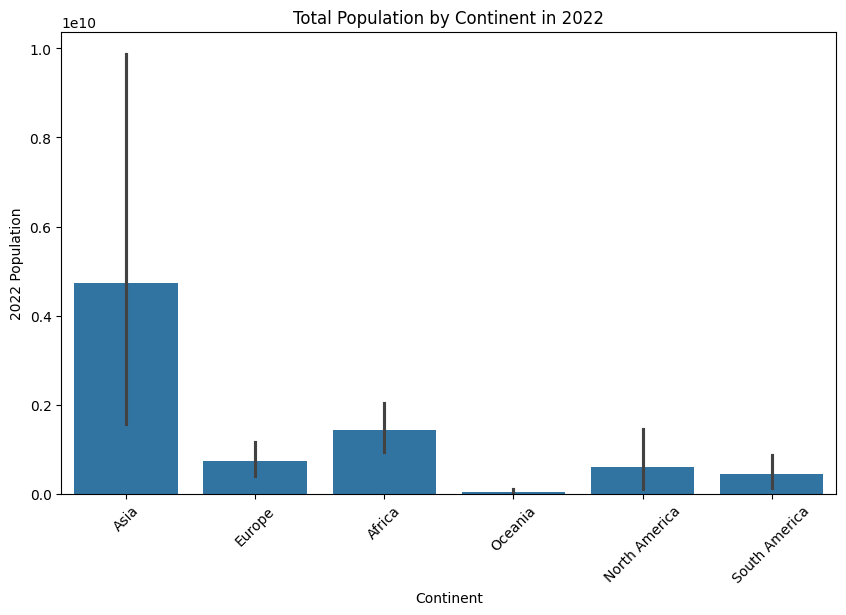

In [33]:
# Population Distribution by Continent
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='2022 Population', data=df, estimator=sum)
plt.title('Total Population by Continent in 2022')
plt.xticks(rotation=45)
plt.show()


Top 10 Most Populous Countries

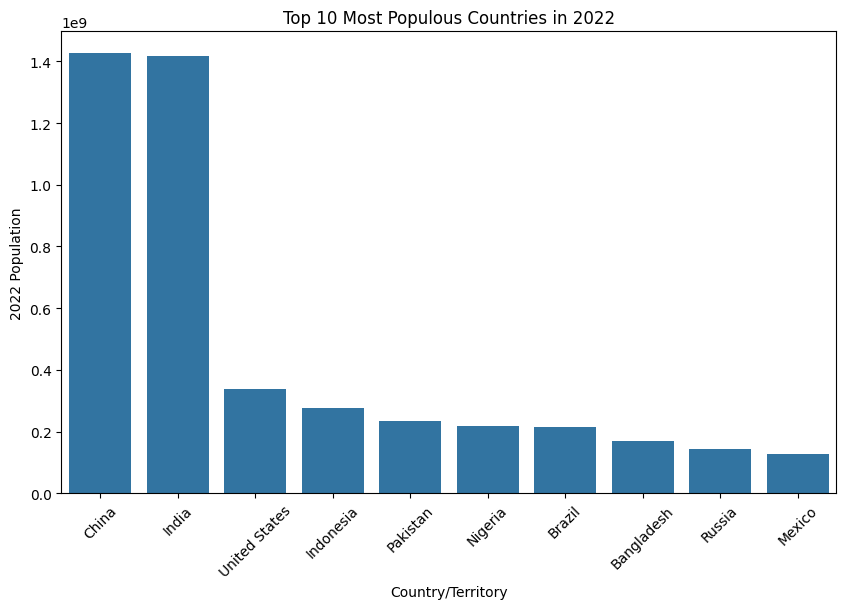

In [34]:
# Top 10 Most Populous Countries in 2022
top_10 = df.nlargest(10, '2022 Population')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country/Territory', y='2022 Population', data=top_10)
plt.title('Top 10 Most Populous Countries in 2022')
plt.xticks(rotation=45)
plt.show()


Population Growth Over Time

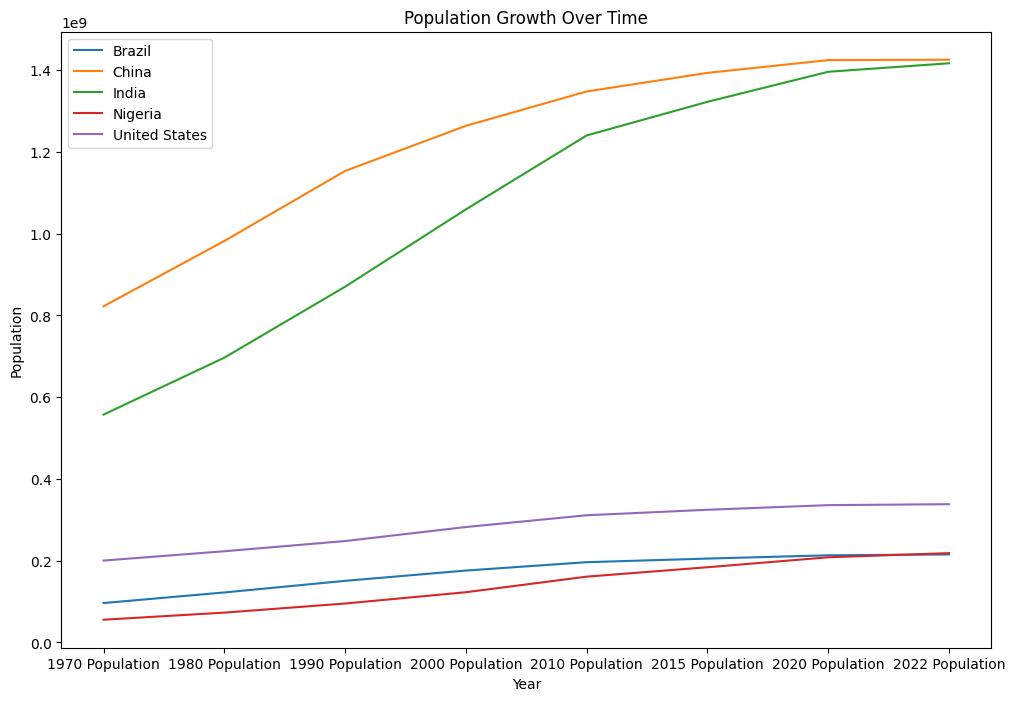

In [16]:
# Population Growth Over Time for Selected Countries
selected_countries = df[df['Country/Territory'].isin(['India', 'China', 'United States', 'Brazil', 'Nigeria'])]
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
plt.figure(figsize=(12, 8))
for country in selected_countries['Country/Territory']:
    plt.plot(years, selected_countries[selected_countries['Country/Territory'] == country][years].values.flatten(), label=country)
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()


Population Density vs. Area

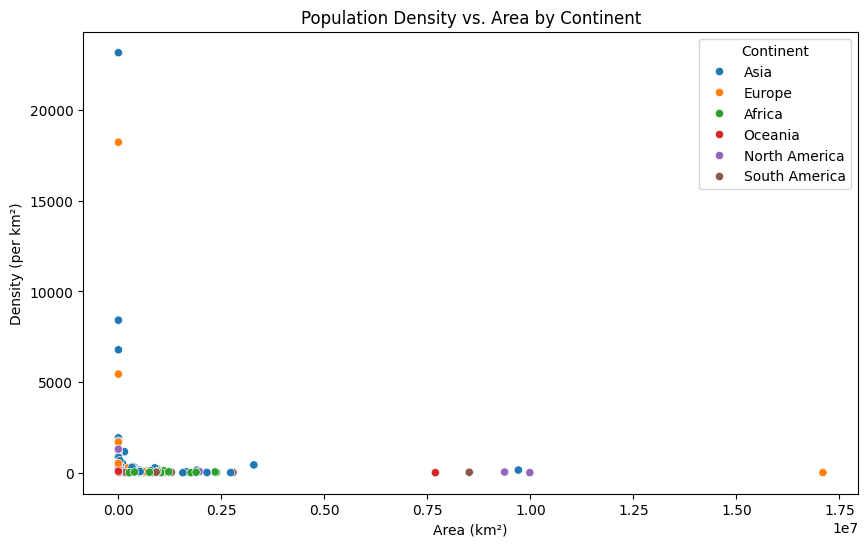

In [17]:
# Scatter plot for Population Density vs. Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (km²)', y='Density (per km²)', hue='Continent', data=df)
plt.title('Population Density vs. Area by Continent')
plt.show()


 World Population Percentage by Country



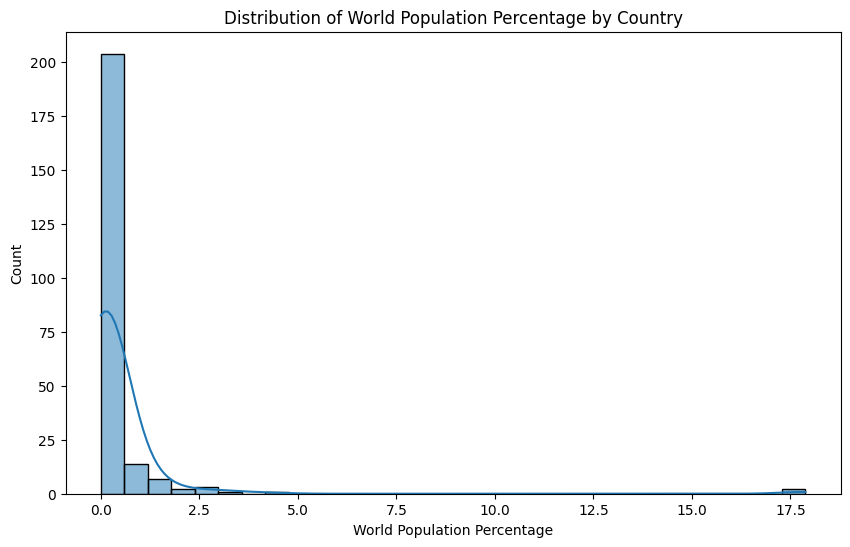

In [18]:
# World Population Percentage by Country
plt.figure(figsize=(10, 6))
sns.histplot(df['World Population Percentage'], kde=True, bins=30)
plt.title('Distribution of World Population Percentage by Country')
plt.show()


Top 10 Densest Countries

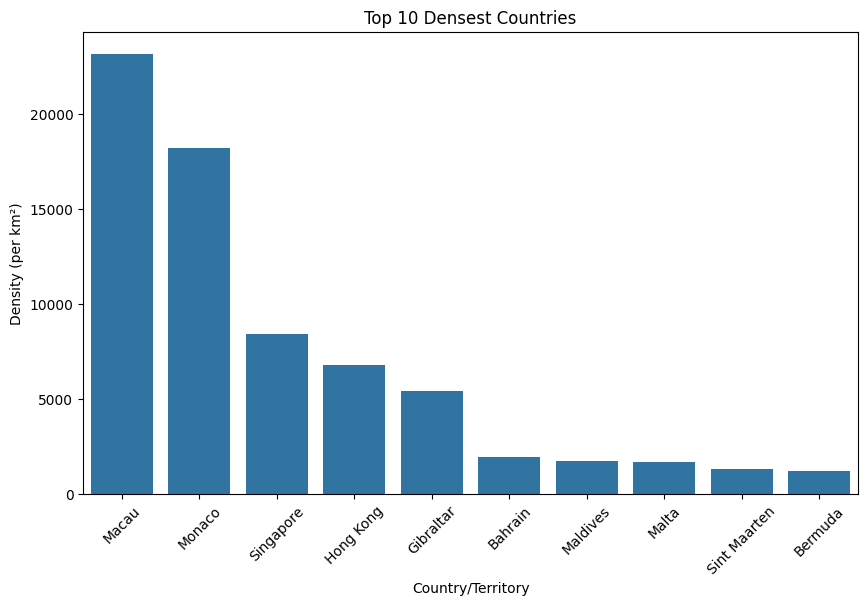

In [19]:
# Top 10 Densest Countries
top_10_density = df.nlargest(10, 'Density (per km²)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country/Territory', y='Density (per km²)', data=top_10_density)
plt.title('Top 10 Densest Countries')
plt.xticks(rotation=45)
plt.show()


Growth Rate Distribution by Continent

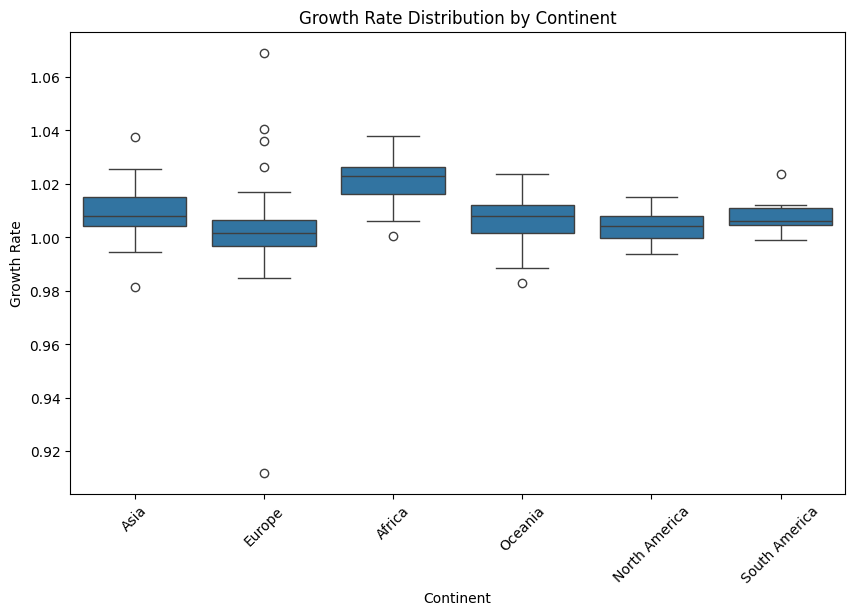

In [20]:
# Growth Rate Distribution by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Growth Rate', data=df)
plt.title('Growth Rate Distribution by Continent')
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap

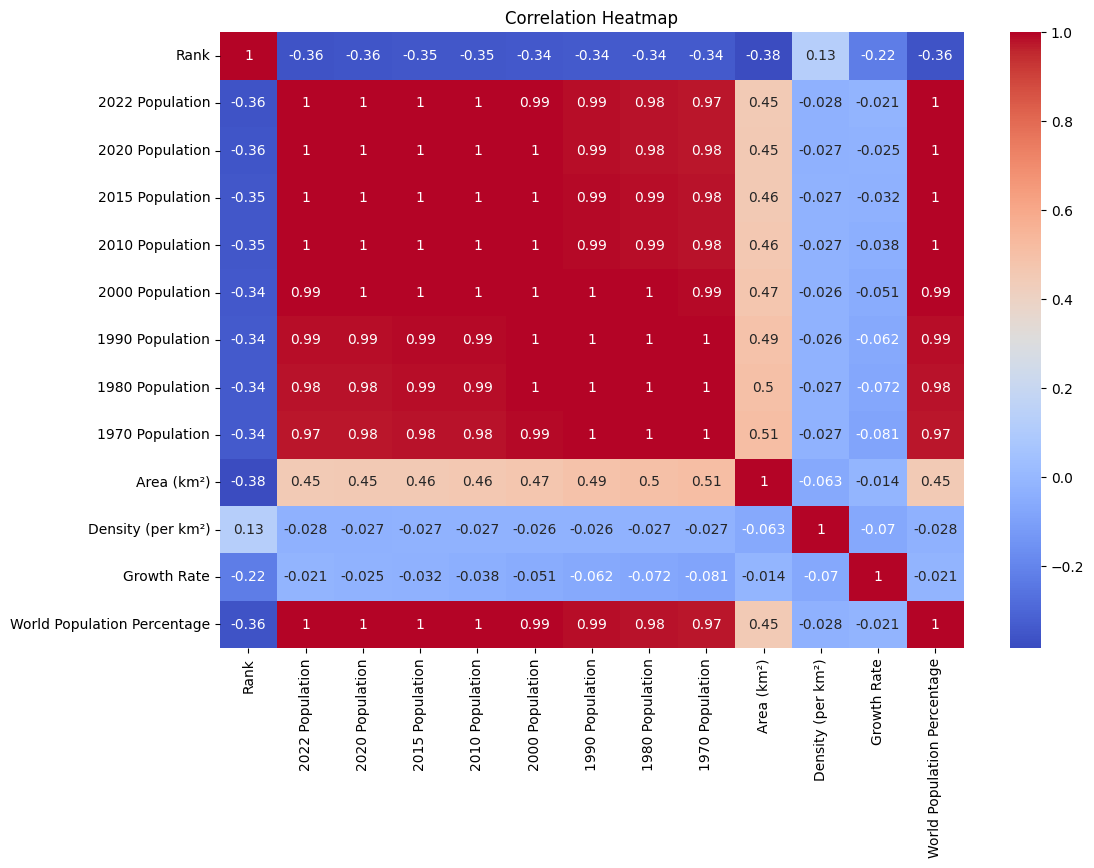

In [22]:
# Correlation Heatmap
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Population Growth Rate vs. World Population Percentage

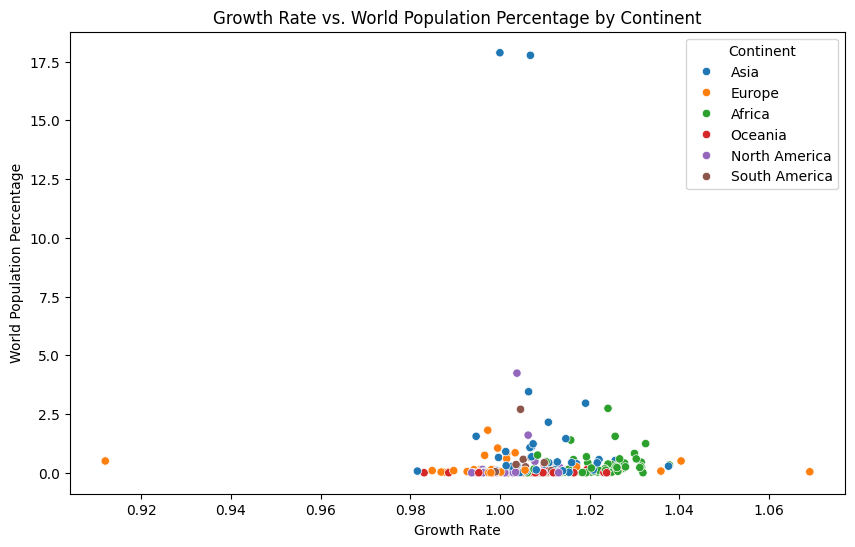

In [23]:
# Scatter plot for Growth Rate vs. World Population Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Growth Rate', y='World Population Percentage', hue='Continent', data=df)
plt.title('Growth Rate vs. World Population Percentage by Continent')
plt.show()


Population Density Across Continents

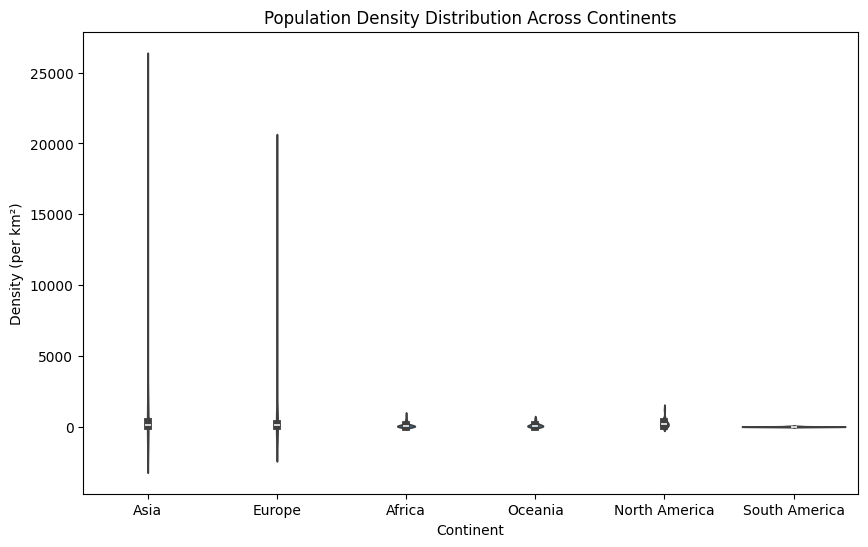

In [24]:
# Population Density Across Continents
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continent', y='Density (per km²)', data=df)
plt.title('Population Density Distribution Across Continents')
plt.show()


Feature Engineering

New features are created to capture additional insights, such as the change in population from 2000 to 2022 and categorizing countries based on population density.

In [39]:
# Feature Engineering - A new feature 'Population Change (2000-2022)'
df['Population Change (2000-2022)'] = df['2022 Population'] - df['2000 Population']

# Creating a feature to represent Population Density Category
df['Density Category'] = pd.cut(df['Density (per km²)'], bins=[0, 50, 200, 500, 1000, np.inf], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

#updated DataFrame
print(df[['Country/Territory', 'Population Change (2000-2022)', 'Density Category']].head())


  Country/Territory  Population Change (2000-2022) Density Category
0       Afghanistan                       21585789              Low
1           Albania                        -339700              Low
2           Algeria                       14128604         Very Low
3    American Samoa                         -13957           Medium
4           Andorra                          13727              Low


Model Building

In [40]:
# Splitting the data into training and testing sets
X = df[['2020 Population', '2015 Population', '2010 Population', '2000 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate']]
y = df['2022 Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:

#Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:

y_pred = lr.predict(X_test)

The data is split into training and testing sets, and a Linear Regression model is applied to predict the 2022 population. The model is evaluated using MSE, RMSE, and R-squared metrics.

In [38]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 315548670001.29944
Root Mean Squared Error: 561737.1894412007
R-squared: 0.9999034458768176


(i). **Mean Squared Error (MSE)**:
315
,
548
,
670
,
001.29944

  315,548,670,001.29944 - This value represents the average squared difference between the actual and predicted values. A lower MSE indicates better model performance, though the scale of this number depends on the size of the population numbers being predicted.


(ii).**Root Mean Squared Error (RMSE)**:
  561
,
737.189
561,737.189 - This is the square root of the MSE and provides a measure of the average magnitude of the error in the units of the target variable (population). The RMSE is easier to interpret compared to MSE, and here it's relatively low given the large populations being predicted.


(iii).**R-squared**:
  0.9999
0.9999 - This value is very close to 1, indicating that the model explains almost all the variance in the target variable. An R-squared value this high typically suggests that the model is highly accurate in its predictions.

Model Enhancement-- Using Advanced Algoriths





In [41]:
# Applying RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 109604492868372.39
Root Mean Squared Error (Random Forest): 10469216.440038498
R-squared (Random Forest): 0.9664623346195106


(i). Mean Squared Error (MSE):
109
,
604
,
492
,
868
,
372.39
109,604,492,868,372.39 - This value is larger than what was observed with the Linear Regression model. However, given the large magnitude of the population numbers, it still reflects a good model, but it indicates that the model's predictions are more spread out compared to the actual values.

(ii). Root Mean Squared Error (RMSE):
10
,
469
,
216.44
10,469,216.44 - This value is significantly higher than the RMSE of the Linear Regression model, meaning that on average, the Random Forest model has larger prediction errors.

(iii). R-squared:
0.9665
0.9665 - This value suggests that the Random Forest model explains approximately 96.65% of the variance in the target variable. While still a strong performance, it's not as close to 1 as the Linear Regression model, indicating that Linear Regression might be a better fit for this particular dataset.

 Implemented hyperparameter tuning using GridSearchCV for Random Forest: for more enhanced model

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



This grid defines the parameters and the values that will be tested to find the best combination.



In [45]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [46]:
# Creating a base model
rf = RandomForestRegressor(random_state=42)

GridSearchCV: This is used to search over specified parameter values for an estimator.

In [48]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Fitting the Model: grid_search.fit(X_train, y_train) finds the optimal parameters by fitting the model to the training data.

In [49]:
# Using the best model found
best_rf = grid_search.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)


the tuned model's performance is evaluated using MSE, RMSE, and R-squared metrics.



In [50]:
#Model Evaluation
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Mean Squared Error (Tuned Random Forest):", mse_rf_tuned)
print("Root Mean Squared Error (Tuned Random Forest):", rmse_rf_tuned)
print("R-squared (Tuned Random Forest):", r2_rf_tuned)


Mean Squared Error (Tuned Random Forest): 120140082537812.89
Root Mean Squared Error (Tuned Random Forest): 10960843.149037983
R-squared (Tuned Random Forest): 0.9632385700486169


(i). **Mean Squared Error (MSE):**
120,140,082,537,812.89 is the average squared difference between the actual and predicted values.
**A lower MSE indicates better predictive accuracy**.

(ii). **Root Mean Squared Error (RMSE):**
10,960,843.15 is the square root of the MSE, providing a more interpretable measure of prediction error in the same units as the target variable. This value represents the average magnitude of error in the model’s predictions.

(iii).**R-squared (R²):**
0.9632 indicates that the model explains 96.32% of the variance in the target variable.
**This is a strong indication that the model fits the data well.**

Conclusion Based on Visuals

Actual vs. Predicted Plot: If the points lie close to the red diagonal line, it indicates good predictions. A perfect model would have all points on this line.

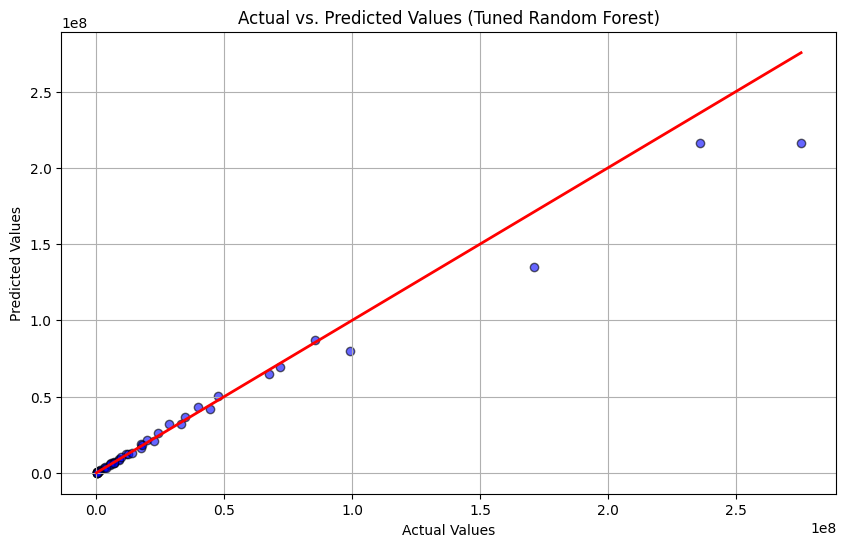

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs predicted values for the tuned Random Forest model
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_rf_tuned, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Tuned Random Forest)')
plt.grid(True)
plt.show()


Plotting Residuals

Residuals should be randomly distributed around zero. Patterns or trends in the residuals could suggest that the model is not capturing all the information in the data.

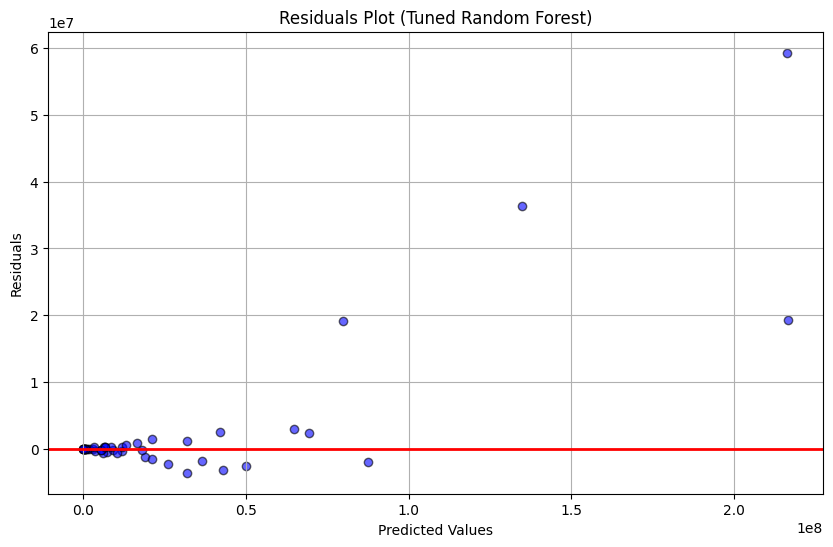

In [53]:

residuals = y_test - y_pred_rf_tuned

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_tuned, residuals, color='blue', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Tuned Random Forest)')
plt.grid(True)
plt.show()


Feature Importances Plot

 This shows which features are contributing the most to the predictions, helping to interpret the model and potentially guide further feature engineering.

This plot helps identify which features are most critical in making predictions. Features with higher importance values contribute more significantly to the model’s decisions.

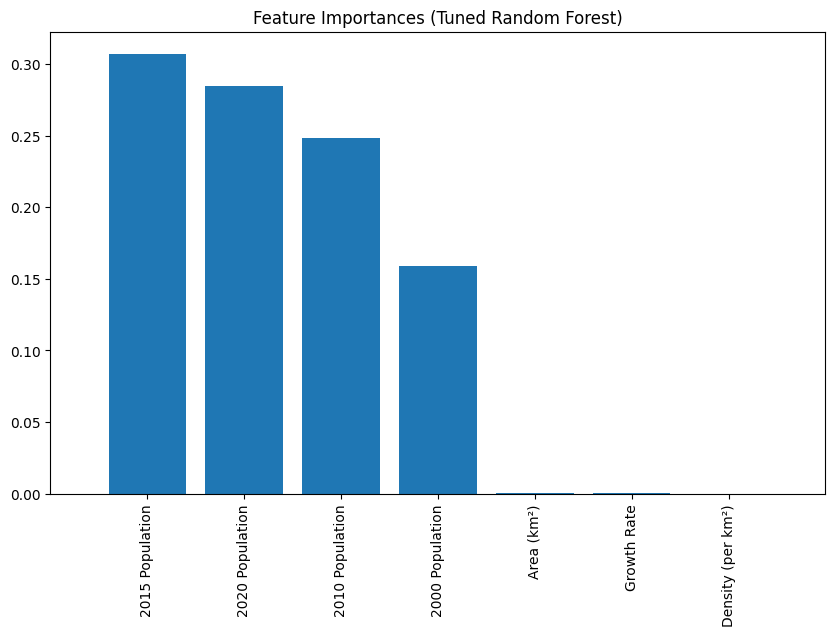

In [54]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Tuned Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


**The tuned Random Forest model demonstrates strong predictive capabilities, with an R-squared value of 0.9632, indicating that the model explains over 96% of the variance in the population data. The residuals plot suggests that the model's errors are randomly distributed, supporting the reliability of the model's predictions. Feature importance analysis reveals key factors influencing population estimates, guiding further analysis and potential improvements. The performance metrics, along with the visualizations, indicate that the model is well-suited for deployment in predictive population analysis tasks**.
